In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv("C:/Users/FREDDIE/Downloads/cia_factbook.csv")
dataset

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80
...,...,...,...,...,...,...,...,...,...,...,...
254,Bouvet Island,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,Palmyra Atoll,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Akrotiri,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,European Union,NaN,NaN,NaN,4.33,NaN,80.02,NaN,NaN,5.114348e+08,NaN


Perform Exploratory Data Analysis

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  259 non-null    object 
 1   area                     257 non-null    float64
 2   birth_rate               224 non-null    float64
 3   death_rate               225 non-null    float64
 4   infant_mortality_rate    224 non-null    float64
 5   internet_users           213 non-null    float64
 6   life_exp_at_birth        224 non-null    float64
 7   maternal_mortality_rate  184 non-null    float64
 8   net_migration_rate       222 non-null    float64
 9   population               238 non-null    float64
 10  population_growth_rate   233 non-null    float64
dtypes: float64(10), object(1)
memory usage: 22.4+ KB


In [7]:
dataset.isna().sum()

country                     0
area                        2
birth_rate                 35
death_rate                 34
infant_mortality_rate      35
internet_users             46
life_exp_at_birth          35
maternal_mortality_rate    75
net_migration_rate         37
population                 21
population_growth_rate     26
dtype: int64

In [11]:
import plotly.express as px
fig = px.histogram(dataset, x='birth_rate')
fig.update_layout(title = "Birth Rate Distribution", height = 500)
fig.update_layout(xaxis_title = "Birth Rate", yaxis_title = "Count")
fig.show()

In [12]:
fig = px.histogram(dataset, x='death_rate')
fig.update_layout(title = "Death Rate Distribution", height = 500)
fig.update_layout(xaxis_title = "Death Rate", yaxis_title = "Count")
fig.show()

In [13]:
fig = px.histogram(dataset, x='population')
fig.update_layout(title = "Population Distribution", height = 500)
fig.update_layout(xaxis_title = "Population", yaxis_title = "Count")
fig.show()

Feature Engineering for Missing Data

In [18]:

dataset.isna().sum()

country                            0
area                               0
birth_rate                         0
death_rate                         0
infant_mortality_rate              0
internet_users                     0
life_exp_at_birth                  0
maternal_mortality_rate            0
net_migration_rate                 0
population                         0
population_growth_rate             0
country_missing                    0
area_missing                       0
birth_rate_missing                 0
death_rate_missing                 0
infant_mortality_rate_missing      0
internet_users_missing             0
life_exp_at_birth_missing          0
maternal_mortality_rate_missing    0
net_migration_rate_missing         0
population_missing                 0
population_growth_rate_missing     0
dtype: int64

In [15]:
# Replace missing values with mean for numeric columns only
numeric_columns = dataset.select_dtypes(include='number').columns
dataset[numeric_columns] = dataset[numeric_columns].fillna(dataset[numeric_columns].mean())

# Create binary indicator variables for missing values
for col in dataset.columns:
    dataset[col + '_missing'] = dataset[col].isnull().astype(int)

# Drop rows with missing values
dataset.dropna(inplace=True)

# Drop features with too many missing values
threshold = 0.5  # Example threshold for dropping features with more than 50% missing values
dataset = dataset.dropna(axis=1, thresh=threshold*len(dataset))

# Print the modified dataset
print(dataset)


              country          area  birth_rate  death_rate  \
0              Russia  1.709824e+07   11.870000   13.830000   
1              Canada  9.984670e+06   10.290000    8.310000   
2       United States  9.826675e+06   13.420000    8.150000   
3               China  9.596960e+06   12.170000    7.440000   
4              Brazil  8.514877e+06   14.720000    6.540000   
..                ...           ...         ...         ...   
254     Bouvet Island  4.900000e+01   19.659063    7.906978   
255     Palmyra Atoll  1.200000e+01   19.659063    7.906978   
256          Akrotiri  1.230000e+02   19.659063    7.906978   
257    European Union  5.308881e+05   19.659063    7.906978   
258  Saint Barthelemy  5.308881e+05   19.659063    7.906978   

     infant_mortality_rate  internet_users  life_exp_at_birth  \
0                  7.08000    4.085300e+07          70.160000   
1                  4.71000    2.696000e+07          81.670000   
2                  6.17000    2.450000e+08      

TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?

In [21]:
# Select countries with missing data in any feature
countries_with_missing_data = dataset[dataset.iloc[:, :-11].isnull().any(axis=1)]['country']

# Print countries with missing data
print("Countries with missing data:")
print(countries_with_missing_data)

# Explore other features to identify the main aspect of these countries
main_aspect = dataset.loc[countries_with_missing_data.index].mean().idxmax()
print("\nMain aspect of these countries based on mean feature values:", main_aspect)



Countries with missing data:
Series([], Name: country, dtype: object)

Main aspect of these countries based on mean feature values: nan


C:\Users\FREDDIE\AppData\Local\Temp\ipykernel_16456\1872381365.py:9: FutureWarning:

The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError



In [22]:
# Select countries with NaN values in agriculture-related features
agriculture_related_features = ['birth_rate', 'death_rate', 'population_growth_rate']
countries_with_nan_agriculture = dataset[dataset[agriculture_related_features].isna().any(axis=1)]['country']

# Print countries with NaN for Agriculture-related features
print("Countries with NaN for Agriculture-related features:")
print(countries_with_nan_agriculture)

# Explore other features to identify the main aspect of these countries
main_aspect = dataset.loc[countries_with_nan_agriculture.index].mean().idxmax()
print("\nMain aspect of these countries based on mean feature values:", main_aspect)


Countries with NaN for Agriculture-related features:
Series([], Name: country, dtype: object)

Main aspect of these countries based on mean feature values: nan


C:\Users\FREDDIE\AppData\Local\Temp\ipykernel_16456\649816911.py:10: FutureWarning:

The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError



TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region

TASK: Use the same method for the missing values in Literacy.

In [34]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

imputer = SimpleImputer(strategy='mean')
dataset = pd.DataFrame(imputer.fit_transform(dataset.select_dtypes(include=[np.number])), columns=dataset.select_dtypes(include=[np.number]).columns)

# Add new features
dataset['population_density'] = dataset['population'] / dataset['area']
dataset['natural_increase_rate'] = dataset['birth_rate'] - dataset['death_rate']
dataset['population_log'] = np.log(dataset['population'] + 1)

# Drop rows with missing values
dataset.dropna(inplace=True)


In [38]:

dataset.isna().sum()


area                               0
birth_rate                         0
death_rate                         0
infant_mortality_rate              0
internet_users                     0
life_exp_at_birth                  0
maternal_mortality_rate            0
net_migration_rate                 0
population                         0
population_growth_rate             0
country_missing                    0
area_missing                       0
birth_rate_missing                 0
death_rate_missing                 0
infant_mortality_rate_missing      0
internet_users_missing             0
life_exp_at_birth_missing          0
maternal_mortality_rate_missing    0
net_migration_rate_missing         0
population_missing                 0
population_growth_rate_missing     0
Cluster                            0
population_density                 0
natural_increase_rate              0
population_log                     0
dtype: int64

In [39]:

dataset.head()

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,...,internet_users_missing,life_exp_at_birth_missing,maternal_mortality_rate_missing,net_migration_rate_missing,population_missing,population_growth_rate_missing,Cluster,population_density,natural_increase_rate,population_log
0,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.332451,-1.96,18.774644
1,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.488832,1.98,17.366129
2,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,32.451679,5.27,19.580363
3,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,141.262710,4.73,21.027578
4,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,23.800319,8.18,19.127024


TASK: Create a dummy variable to all categorical data.

In [40]:
dataset.head()

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,...,internet_users_missing,life_exp_at_birth_missing,maternal_mortality_rate_missing,net_migration_rate_missing,population_missing,population_growth_rate_missing,Cluster,population_density,natural_increase_rate,population_log
0,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.332451,-1.96,18.774644
1,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.488832,1.98,17.366129
2,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,32.451679,5.27,19.580363
3,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,141.262710,4.73,21.027578
4,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,23.800319,8.18,19.127024


In [41]:

X = pd.get_dummies(dataset)
X

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,...,internet_users_missing,life_exp_at_birth_missing,maternal_mortality_rate_missing,net_migration_rate_missing,population_missing,population_growth_rate_missing,Cluster,population_density,natural_increase_rate,population_log
0,1.709824e+07,11.870000,13.830000,7.08000,4.085300e+07,70.160000,34.000000,1.690000,1.424703e+08,-0.030000,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.332451e+00,-1.960000,18.774644
1,9.984670e+06,10.290000,8.310000,4.71000,2.696000e+07,81.670000,12.000000,5.660000,3.483484e+07,0.760000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.488832e+00,1.980000,17.366129
2,9.826675e+06,13.420000,8.150000,6.17000,2.450000e+08,79.560000,21.000000,2.450000,3.188921e+08,0.770000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.245168e+01,5.270000,19.580363
3,9.596960e+06,12.170000,7.440000,14.79000,3.890000e+08,75.150000,37.000000,-0.320000,1.355693e+09,0.440000,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.412627e+02,4.730000,21.027578
4,8.514877e+06,14.720000,6.540000,19.21000,7.598200e+07,73.280000,56.000000,-0.150000,2.026568e+08,0.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.380032e+01,8.180000,19.127024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,4.900000e+01,19.659063,7.906978,24.48442,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.590686e+05,11.752085,17.290403
255,1.200000e+01,19.659063,7.906978,24.48442,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.691197e+06,11.752085,17.290403
256,1.230000e+02,19.659063,7.906978,24.48442,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.625558e+05,11.752085,17.290403
257,5.308881e+05,19.659063,7.906978,4.33000,8.311771e+06,80.020000,177.972826,-0.181577,5.114348e+08,1.100858,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9.633570e+02,11.752085,20.052731


TASK: For numerical data perform standard scaler.

In [42]:
# Remove infinite values and values greater than 1e6
remove_mask = np.isinf(X.values) | (X.values > 1e6)
X[remove_mask] = np.nan

# Impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_imputed)


Plot the within sum of squares vs. the number of cluster and find the optimal number of clusters.

In [43]:
model = KMeans(n_clusters=2)

cluster_labels = model.fit_predict(scaled_X)
cluster_labels

c:\Users\FREDDIE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

c:\Users\FREDDIE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\FREDDIE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\FREDDIE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\FREDDIE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

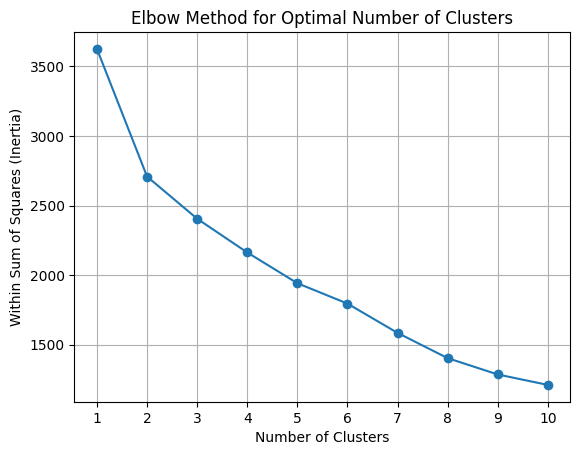

In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize a list to store inertia values
inertia_values = []

# Define range of cluster numbers to try
cluster_range = range(1, 11)  # Try cluster numbers from 1 to 10

# Iterate over each cluster number
for num_clusters in cluster_range:
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(scaled_X)
    
    # Append inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plot the within-cluster sum of squares vs. number of clusters
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


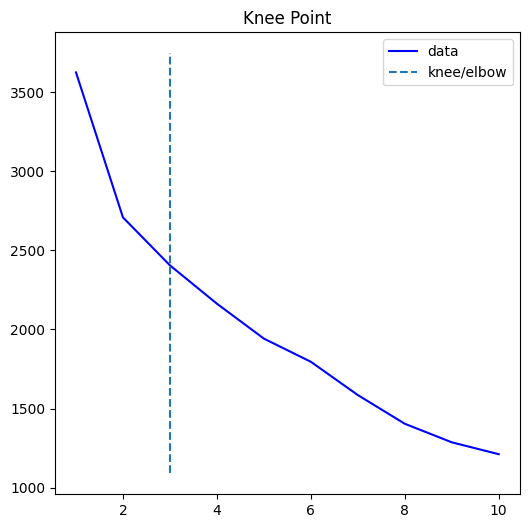

In [53]:
kl = KneeLocator(x=cluster_range, y=inertia_values, curve='convex', direction='decreasing')
kl.plot_knee()


In [54]:
elbow_point = kl.elbow # Use kl.knee for knee point
elbow_point

3

In [56]:
optimal_model = KMeans(n_clusters=elbow_point)

optimal_cluster_labels = optimal_model.fit_predict(scaled_X)
optimal_cluster_labels

c:\Users\FREDDIE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices.

It's possible that there are multiple reasonable choices for the K value, especially if the data can be interpreted in different ways or if there is no clear structure in the data. In such cases, it's essential to evaluate the quality and interpretability of the clusters for each choice of K and select the one that best aligns with your objectives and domain knowledge.